### IMDB DATASET :- (Internet Movie Database)
                       :-- Is an online database of information related to films, television programs, home videos, video games, and streaming content online.    

### Import Libraries

In [3]:
import numpy as np 
import pandas as pd 
from pandas import DataFrame,Series
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
%matplotlib inline
matplotlib.style.use('ggplot')

## import data and check it

In [4]:
im=pd.read_csv('IMDB-Movie-Data.csv',index_col='Rank')
im.head()

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [5]:
im.tail(2)

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [6]:
im.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(3), object(5)
memory usage: 93.8+ KB


In [7]:
im.describe()

,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [60]:
 im.shape

(1000, 12)

### Check out Datatypes,Missing values,Unique values,Count 

In [9]:
dt=DataFrame({'Datatype':im.dtypes,'Missing values':im.isnull().sum(),'Unique values':im.nunique(),'Count':im.count()})
dt

,Datatype,Missing values,Unique values,Count
Title,object,0,999,1000
Genre,object,0,207,1000
Description,object,0,1000,1000
Director,object,0,644,1000
Actors,object,0,996,1000
Year,int64,0,11,1000
Runtime (Minutes),int64,0,94,1000
Rating,float64,0,55,1000
Votes,int64,0,997,1000
Revenue (Millions),float64,128,814,872


In [10]:
dt.T

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Datatype,object,object,object,object,object,int64,int64,float64,int64,float64,float64
Missing values,0,0,0,0,0,0,0,0,0,128,64
Unique values,999,207,1000,644,996,11,94,55,997,814,84
Count,1000,1000,1000,1000,1000,1000,1000,1000,1000,872,936


### Check top null values columns

In [11]:
im.isna().sum().sort_values(ascending=False).head(2)###check top  null values columns

Revenue (Millions)    128
Metascore              64
dtype: int64

### Fill Null Values

#### fill null values on the top null values columns with the help of median.

In [12]:
im['Revenue (Millions)'].mean()

82.95637614678897

In [13]:
im['Revenue (Millions)'].median()

47.985

In [14]:
im['Revenue (Millions)']=im['Revenue (Millions)'].fillna(im['Revenue (Millions)'].median())
print(im['Revenue (Millions)'].isnull().sum())

0


In [15]:
rev=im['Revenue (Millions)']

In [16]:
rev.tail()

Rank
996     47.985
997     17.540
998     58.010
999     47.985
1000    19.640
Name: Revenue (Millions), dtype: float64

In [17]:
print(im['Metascore'].mean())
print(im['Metascore'].median())
im['Metascore']=im['Metascore'].fillna(im['Metascore'].median())
print(im['Metascore'].isnull().sum())
meta=im['Metascore']
meta.head(20)

58.98504273504273
59.5
0


Rank
1     76.0
2     65.0
3     62.0
4     59.0
5     40.0
6     42.0
7     93.0
8     71.0
9     78.0
10    41.0
11    66.0
12    74.0
13    65.0
14    81.0
15    70.0
16    61.0
17    71.0
18    58.0
19    69.0
20    81.0
Name: Metascore, dtype: float64

In [41]:
im.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 12 columns):
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    1000 non-null float64
Metascore             1000 non-null float64
Category              1000 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 141.6+ KB


### Analyse Data 

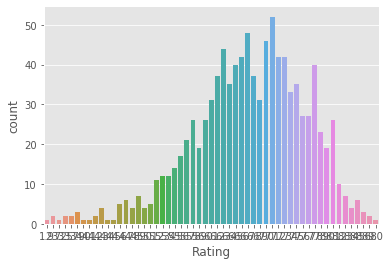

In [39]:
sns.countplot(x='Rating',data=im)
plt.show()

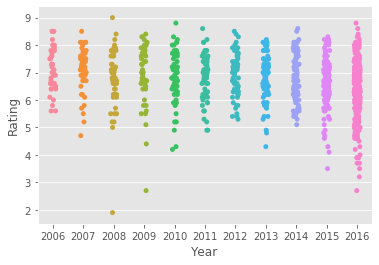

In [19]:
sns.stripplot(x='Year',y='Rating',data=im)##A strip plot is a scatter plot where one of the variables is categorical.
plt.show()##

In [20]:
im['Rating'].describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: Rating, dtype: float64

#### Check outlier & Skewness of the columns

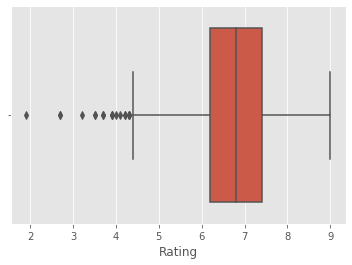

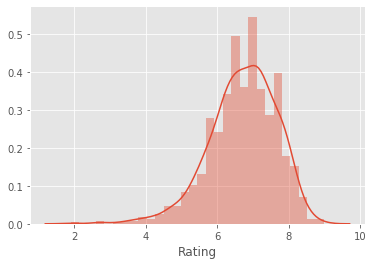

skewed=-0.7431419408051025

Kurtois=1.322270288380786



In [21]:
sns.boxplot(im['Rating'])
plt.show()
sns.distplot(im['Rating'])
plt.show()
print('skewed={}\n'.format(im['Rating'].skew()))
print('Kurtois={}\n'.format(im['Rating'].kurt()))

In [42]:
im['Genre'].describe()#### check out highest equal values in top columns.


count                        1000
unique                        207
top       Action,Adventure,Sci-Fi
freq                           50
Name: Genre, dtype: object

In [45]:
im['Genre'].value_counts().head(15)

Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Comedy,Drama                  27
Animation,Adventure,Comedy    27
Action,Adventure,Fantasy      27
Comedy,Romance                26
Crime,Drama,Thriller          24
Crime,Drama,Mystery           23
Action,Adventure,Drama        18
Action,Crime,Drama            17
Horror,Thriller               16
Drama,Thriller                15
Name: Genre, dtype: int64

In [25]:
len(im['Genre'].unique())###check total length of column.

207

### Correlation()

In [46]:
cor=im.corr()
cor

,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Year,1.000000,-0.164900,-0.211219,-0.411904,-0.146589,-0.075970
Runtime (Minutes),-0.164900,1.000000,0.392214,0.407062,0.272955,0.202079
Rating,-0.211219,0.392214,1.000000,0.511537,0.218448,0.604522
Votes,-0.411904,0.407062,0.511537,1.000000,0.638758,0.317268
Revenue (Millions),-0.146589,0.272955,0.218448,0.638758,1.000000,0.141381
Metascore,-0.075970,0.202079,0.604522,0.317268,0.141381,1.000000


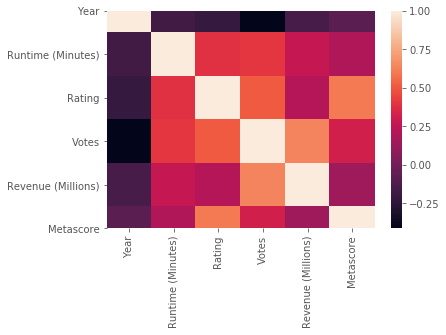

In [28]:
sns.heatmap(cor)###Draw heatmap of correlation.In this correlation show white value show larger correlation and black value show less corelation().  
plt.show()

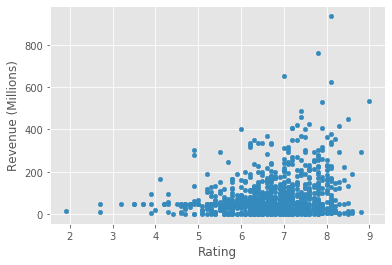

In [29]:
im.plot(kind='scatter',x='Rating',y='Revenue (Millions)')##scatter plot shows highly points present in between 6 to 7 point and 8th pt show highest revenue(millions).
plt.show()

In [47]:
im['Year'].value_counts()

2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: Year, dtype: int64

In [31]:
im['Rating'].value_counts().head(20)

7.1    52
6.7    48
7.0    46
6.3    44
6.6    42
7.2    42
7.3    42
6.5    40
7.8    40
6.2    37
6.8    37
7.5    35
6.4    35
7.4    33
6.9    31
6.1    31
7.6    27
7.7    27
5.8    26
6.0    26
Name: Rating, dtype: int64

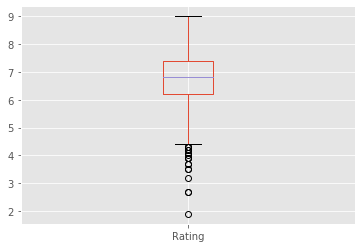

In [32]:
im['Rating'].plot(kind='box' )###Draw boxplot for Rating.In boxplot wee see that 6 to 7 point show highest rating which is denoted by red box & (7.1)are the highest point which is showed by blue line. 
plt.show()

In [33]:
im['Rating'].describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: Rating, dtype: float64

In [50]:
Review=[]
for rate in im['Rating']:      ###on the bases of Rating we give title which movie is Hit or flop.
    if rate > 6.0:
        Review.append('HIT ')
    else: 
        Review.append('Flop')

In [51]:
Review

['HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'Flop',
 'HIT ',
 'HIT ',
 'Flop',
 'HIT ',
 'Flop',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'Flop',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'Flop',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'Flop',
 'HIT ',
 'Flop',
 'HIT ',
 'Flop',
 'Flop',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'Flop',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'Flop',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'Flop',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'Flop',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'HIT ',
 'Flop',
 'HIT ',
 'Flop',
 'HIT ',
 'HIT ',
 

In [52]:
im['Category'] =Review

In [53]:
im.head(2)

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Category
Rank,,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,HIT
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,HIT


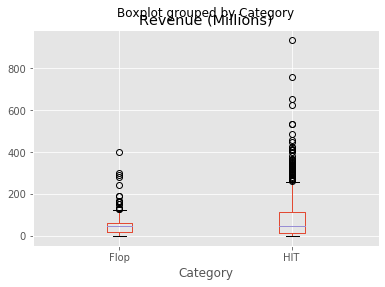

In [54]:
im.boxplot(column='Revenue (Millions)',by='Category')###Draw boxplot to show total income of the movie with the help of(Category) and (Revenue(millions))
plt.show()

In [62]:
im.head(2)

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Category
Rank,,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,HIT
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,HIT


In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
label=LabelEncoder()

In [73]:
im['Category']=label.fit_transform(im['Category'])

In [74]:
im['Category'].value_counts()###It shows that (1) for hit movie and (0) for flop movie.

1    790
0    210
Name: Category, dtype: int64